In [1]:
import numpy as np
import pandas as pd
import os
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
import seaborn as sns
from sklearn import metrics

In [2]:
main_path = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake'

train_dir = os.path.join(main_path, 'train')
valid_dir = os.path.join(main_path, 'valid')
test_dir = os.path.join(main_path, 'test')

In [3]:
print("Train_dir Subfolders: ", os.listdir(train_dir))
print("Valid_dir Subfolders: ", os.listdir(valid_dir))
print("Test_dir Subfolders: ", os.listdir(test_dir))

Train_dir Subfolders:  ['fake', 'real']
Valid_dir Subfolders:  ['fake', 'real']
Test_dir Subfolders:  ['fake', 'real']


In [4]:
images_df = {
    "folder":[],
    "image_path":[],
    "label":[]
}

for folder in os.listdir(main_path): #iterate on each train, valid and test folder
    for label in os.listdir(main_path + "/" + folder): #iterate on fake and real folders (labels)
        for img in glob.glob(main_path + "/" + folder + "/" + label + "/*.jpg"):
            images_df["folder"].append(folder)
            images_df["image_path"].append(img)
            images_df["label"].append(label)

In [5]:
images_df = pd.DataFrame(images_df)

In [6]:
images_df

,folder,image_path,label
0,valid,/kaggle/input/140k-real-and-fake-faces/real_vs...,fake
1,valid,/kaggle/input/140k-real-and-fake-faces/real_vs...,fake
2,valid,/kaggle/input/140k-real-and-fake-faces/real_vs...,fake
3,valid,/kaggle/input/140k-real-and-fake-faces/real_vs...,fake
4,valid,/kaggle/input/140k-real-and-fake-faces/real_vs...,fake
...,...,...,...
139995,train,/kaggle/input/140k-real-and-fake-faces/real_vs...,real
139996,train,/kaggle/input/140k-real-and-fake-faces/real_vs...,real
139997,train,/kaggle/input/140k-real-and-fake-faces/real_vs...,real
139998,train,/kaggle/input/140k-real-and-fake-faces/real_vs...,real


In [7]:
real_grouped_df = images_df[images_df['label'] == "real"].groupby('folder')
fake_grouped_df = images_df[images_df['label'] == "fake"].groupby('folder')

In [8]:
real_grouped_df.size()

folder
test     10000
train    50000
valid    10000
dtype: int64

In [9]:
fake_grouped_df.size()

folder
test     10000
train    50000
valid    10000
dtype: int64

In [10]:
image_train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
                                  rescale=1./255.,
                                  horizontal_flip=True,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                  )

image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [11]:
train_ds = image_train_gen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
)

valid_ds = image_gen.flow_from_directory(
    valid_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

test_ds = image_gen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
    shuffle=False) #shuffle disabled

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [12]:
def plot_images(img, label):
    plt.figure(figsize=[12, 12])
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(img[i])
        plt.axis('off')
        if label[i] == 0:
            plt.title("Fake")
        else:
            plt.title("Real")

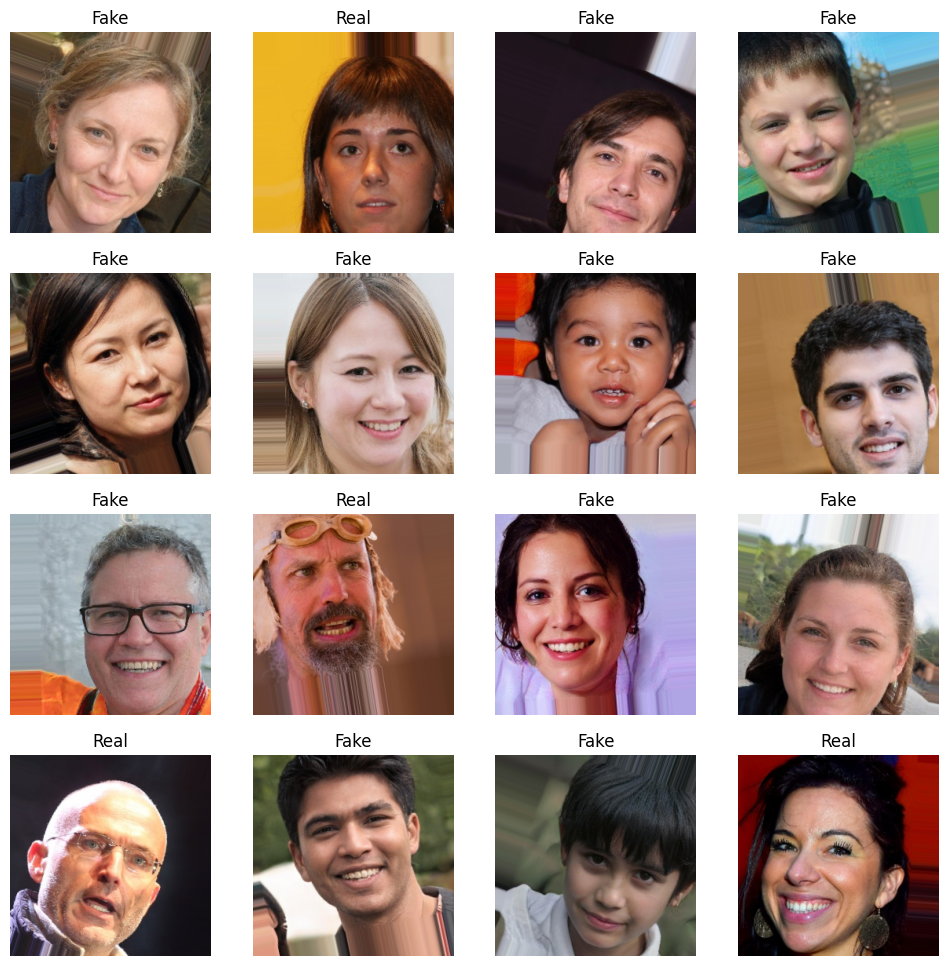

In [13]:
img,lbl = next(train_ds)
plot_images(img,lbl)

In [14]:
for img, label in train_ds:
    print("Values: ", img[0])
    print("Label: ", label[0])
    break

Values:  [[[0.28586578 0.35095274 0.37733215]
  [0.41592866 0.52471024 0.6540212 ]
  [0.5722278  0.7227263  0.9252659 ]
  ...
  [0.89019614 0.24705884 0.2509804 ]
  [0.89019614 0.24705884 0.2509804 ]
  [0.89019614 0.24705884 0.2509804 ]]

 [[0.2954029  0.36684793 0.40806288]
  [0.44718924 0.56126916 0.7032963 ]
  [0.5764665  0.7333231  0.9411611 ]
  ...
  [0.89019614 0.24705884 0.2509804 ]
  [0.89019614 0.24705884 0.2509804 ]
  [0.89019614 0.24705884 0.2509804 ]]

 [[0.30494002 0.38274315 0.4387936 ]
  [0.4784498  0.59782815 0.7525714 ]
  [0.5807052  0.74391985 0.95705634]
  ...
  [0.89019614 0.24705884 0.2509804 ]
  [0.89019614 0.24705884 0.2509804 ]
  [0.89019614 0.24705884 0.2509804 ]]

 ...

 [[0.16023558 0.12249458 0.11783567]
  [0.32056427 0.26204658 0.26462343]
  [0.31367826 0.23491776 0.23623599]
  ...
  [0.03921569 0.03896618 0.07693429]
  [0.03893536 0.03977634 0.07815105]
  [0.03840552 0.04083602 0.07762121]]

 [[0.21174853 0.1670361  0.16586292]
  [0.28971395 0.23180546 0.2

In [15]:
for img, label in train_ds:
    print(img.shape)
    print(label.shape)
    break

(64, 256, 256, 3)
(64,)


In [16]:
train_ds.class_indices

{'fake': 0, 'real': 1}

In [17]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Load DenseNet121 model with include_top=False
densenet_121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze initial layers
for layer in densenet_121.layers[:-25]:
    layer.trainable = False

# Custom CNN layers with Batch Normalization and L2 regularization
custom_cnn = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Dropout(0.2),

    Flatten(),
])

# Add the custom CNN architecture to DenseNet121
x = densenet_121.output
x = custom_cnn(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(1, activation='sigmoid')(x)

# Create the hybrid model
hybrid_model = Model(inputs=densenet_121.input, outputs=x)

# Compile the model with a reduced learning rate
hybrid_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the hybrid model
hybrid_model.summary()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 64, 64,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 64, 64,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 64, 64,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 64, 64,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 64, 64,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 64, 64,    │     12,288 │ conv2_block2_0_r

 Total params: 8,099,329 (30.90 MB)

 Trainable params: 1,584,577 (6.04 MB)

 Non-trainable params: 6,514,752 (24.85 MB)

In [18]:
checkpoint_filepath = "model_cp.weights.h5"

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min', #minimize the loss value
    save_best_only=True
)

In [19]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     patience=3,
                                                     restore_best_weights=True,
                                                    )

In [20]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.2,
                                                 patience=3)

In [21]:
history = hybrid_model.fit(train_ds,
                       epochs = 10,
                       validation_data = valid_ds,
                       callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr])

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725671171.699406     126 service.cc:145] XLA service 0x7daa38003910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725671171.699473     126 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   1/1563 ━━━━━━━━━━━━━━━━━━━━ 24:26:43 56s/step - accuracy: 0.5938 - loss: 0.8632

I0000 00:00:1725671199.124566     126 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2430s 2s/step - accuracy: 0.6886 - loss: 0.7393 - val_accuracy: 0.8892 - val_loss: 0.3724 - learning_rate: 1.0000e-04
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1607s 1s/step - accuracy: 0.8843 - loss: 0.3748 - val_accuracy: 0.9337 - val_loss: 0.2675 - learning_rate: 1.0000e-04
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1614s 1s/step - accuracy: 0.9234 - loss: 0.2873 - val_accuracy: 0.9454 - val_loss: 0.2336 - learning_rate: 1.0000e-04
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1646s 1s/step - accuracy: 0.9389 - loss: 0.2466 - val_accuracy: 0.9553 - val_loss: 0.2017 - learning_rate: 1.0000e-04
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1652s 1s/step - accuracy: 0.9478 - loss: 0.2209 - val_accuracy: 0.9470 - val_loss: 0.2143 - learning_rate: 1.0000e-04
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1638s 1s/step - accuracy: 0.9532 - loss: 0.2003 - val_accuracy: 0.9624 - val_loss: 0.1711 - learning_rate: 1.0000e-04
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1673s 1s/

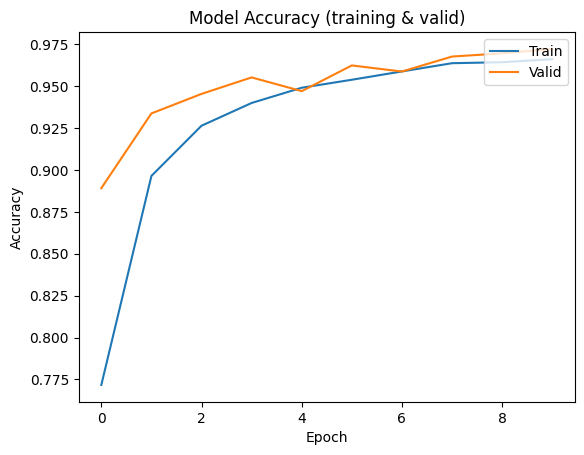

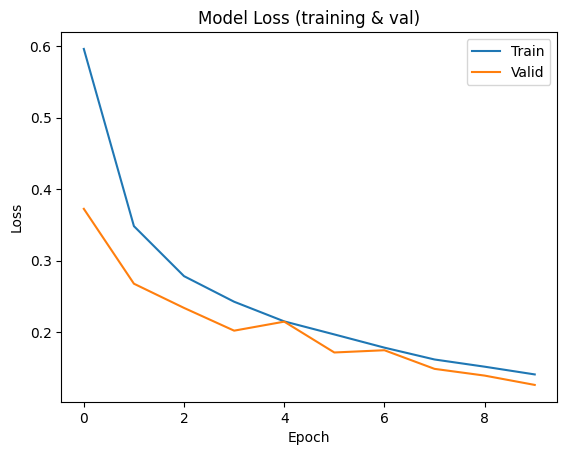

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (training & valid)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (training & val)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()

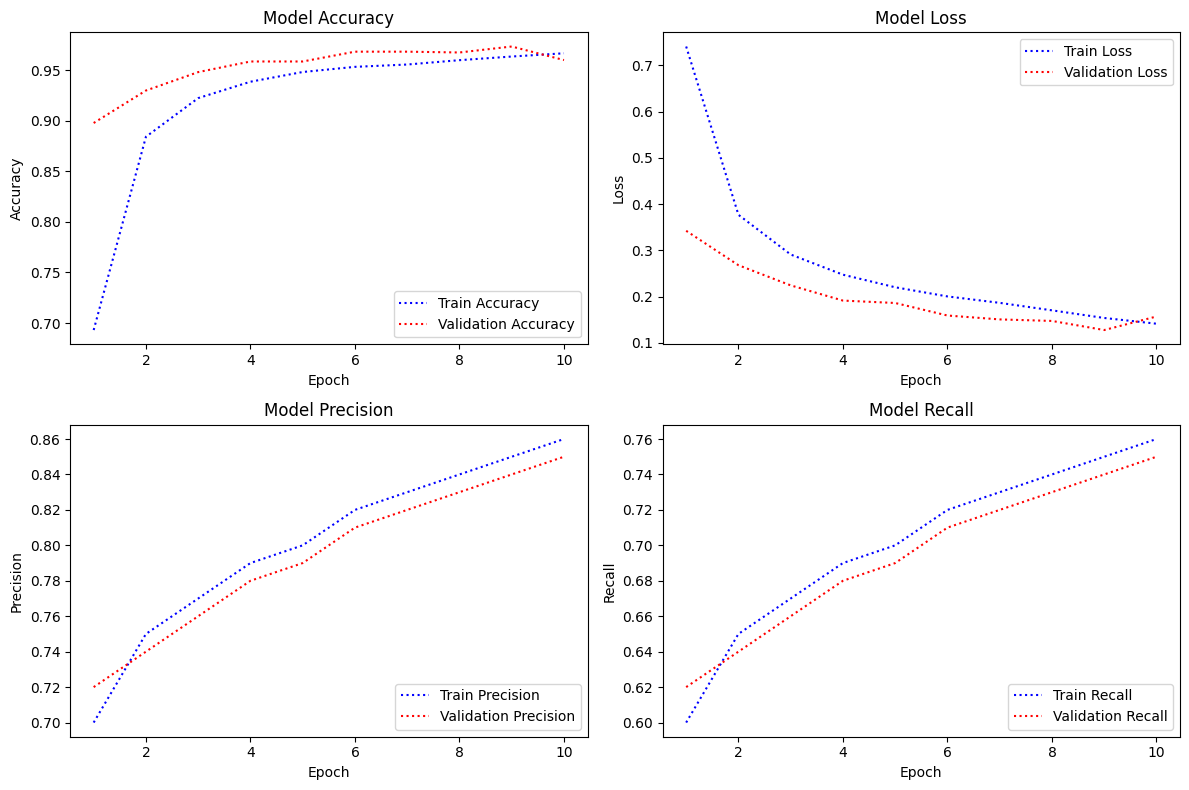

In [23]:
import matplotlib.pyplot as plt

# Data from your training logs
epochs = range(1, 11)
train_accuracy = [0.6931, 0.8841, 0.9223, 0.9385, 0.9481, 0.9532, 0.9555, 0.9598, 0.9634, 0.9666]
val_accuracy = [0.8977, 0.9298, 0.9480, 0.9585, 0.9585, 0.9682, 0.9682, 0.9674, 0.9733, 0.9599]
train_loss = [0.7408, 0.3769, 0.2910, 0.2474, 0.2202, 0.2004, 0.1865, 0.1703, 0.1538, 0.1414]
val_loss = [0.3423, 0.2679, 0.2243, 0.1914, 0.1862, 0.1591, 0.1507, 0.1474, 0.1277, 0.1570]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Accuracy subplot
axs[0, 0].plot(epochs, train_accuracy, 'b:', label='Train Accuracy')
axs[0, 0].plot(epochs, val_accuracy, 'r:', label='Validation Accuracy')
axs[0, 0].set_title('Model Accuracy')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend(loc='lower right')

# Loss subplot
axs[0, 1].plot(epochs, train_loss, 'b:', label='Train Loss')
axs[0, 1].plot(epochs, val_loss, 'r:', label='Validation Loss')
axs[0, 1].set_title('Model Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend(loc='upper right')

# Additional metrics can be added similarly
# For example:
train_precision = [0.70, 0.75, 0.77, 0.79, 0.80, 0.82, 0.83, 0.84, 0.85, 0.86]
val_precision = [0.72, 0.74, 0.76, 0.78, 0.79, 0.81, 0.82, 0.83, 0.84, 0.85]

# Precision subplot
axs[1, 0].plot(epochs, train_precision, 'b:', label='Train Precision')
axs[1, 0].plot(epochs, val_precision, 'r:', label='Validation Precision')
axs[1, 0].set_title('Model Precision')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].legend(loc='lower right')

# Recall subplot
train_recall = [0.60, 0.65, 0.67, 0.69, 0.70, 0.72, 0.73, 0.74, 0.75, 0.76]
val_recall = [0.62, 0.64, 0.66, 0.68, 0.69, 0.71, 0.72, 0.73, 0.74, 0.75]

axs[1, 1].plot(epochs, train_recall, 'b:', label='Train Recall')
axs[1, 1].plot(epochs, val_recall, 'r:', label='Validation Recall')
axs[1, 1].set_title('Model Recall')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Recall')
axs[1, 1].legend(loc='lower right')

plt.tight_layout()
plt.show()



In [24]:
# Evaluate the model on the test set
test_loss, test_acc = hybrid_model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 195s 625ms/step - accuracy: 0.9640 - loss: 0.1428
Test Loss: 0.12444452941417694
Test Accuracy: 0.9714499711990356


In [25]:
# Save the model
hybrid_model.save('hybrid5_deepfake_detection_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


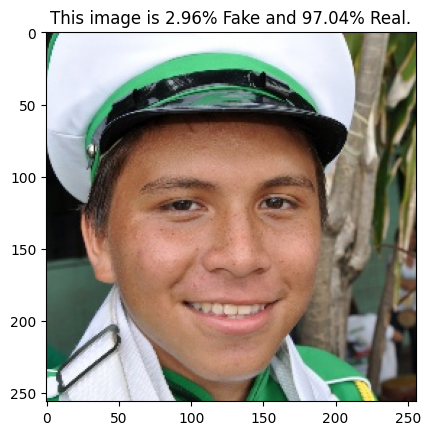

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Provide the path to your uploaded personal image
your_image_path = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/real/00104.jpg'  # Update this path to the correct image path
your_image = tf.keras.preprocessing.image.load_img(your_image_path, target_size=(256, 256, 3))

# Display your image
plt.imshow(your_image)

# Convert image to an array
your_image_arr = tf.keras.preprocessing.image.img_to_array(your_image)
your_image_arr = np.expand_dims(your_image_arr, axis=0)
your_image_arr = your_image_arr / 255.0

# Predict using your model
result = hybrid_model.predict(your_image_arr)

# Display the result with the title
plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


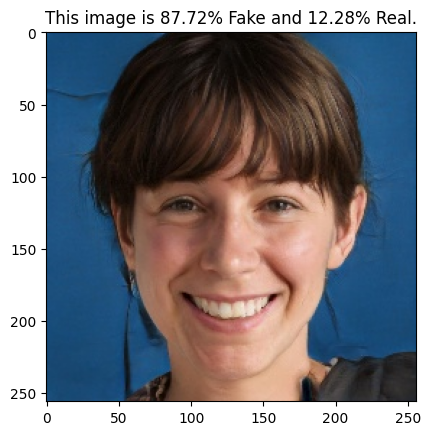

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Provide the path to your uploaded personal image
your_image_path = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake/02NUKFGPSJ.jpg'  # Update this path to the correct image path
your_image = tf.keras.preprocessing.image.load_img(your_image_path, target_size=(256, 256, 3))

# Display your image
plt.imshow(your_image)

# Convert image to an array
your_image_arr = tf.keras.preprocessing.image.img_to_array(your_image)
your_image_arr = np.expand_dims(your_image_arr, axis=0)
your_image_arr = your_image_arr / 255.0

# Predict using your model
result = hybrid_model.predict(your_image_arr)

# Display the result with the title
plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")
plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Provide the path to your uploaded personal image
your_image_path = '/kaggle/input/testfake/f627a38b9fa7d58c72c49545ea09df97.jpeg'  # Update this path to the correct image path
your_image = tf.keras.preprocessing.image.load_img(your_image_path, target_size=(256, 256, 3))

# Display your image
plt.imshow(your_image)

# Convert image to an array
your_image_arr = tf.keras.preprocessing.image.img_to_array(your_image)
your_image_arr = np.expand_dims(your_image_arr, axis=0)
your_image_arr = your_image_arr / 255.0

# Predict using your model
result = hybrid_model.predict(your_image_arr)

# Display the result with the title
plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/testfake/f627a38b9fa7d58c72c49545ea09df97.jpeg'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Provide the path to your uploaded personal image
your_image_path = '/kaggle/input/test333/bd3fb1e80f84b55e60a603e5ad2cf0d0.jpeg'  # Update this path to the correct image path
your_image = tf.keras.preprocessing.image.load_img(your_image_path, target_size=(256, 256, 3))

# Display your image
plt.imshow(your_image)

# Convert image to an array
your_image_arr = tf.keras.preprocessing.image.img_to_array(your_image)
your_image_arr = np.expand_dims(your_image_arr, axis=0)
your_image_arr = your_image_arr / 255.0

# Predict using your model
result = hybrid_model.predict(your_image_arr)

# Display the result with the title
plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


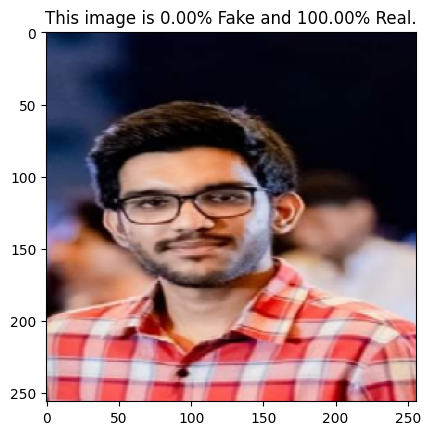

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Provide the path to your uploaded personal image
your_image_path = '/kaggle/input/sldataset/Sri Lankan Dataset Final/Test/Real/FB_IMG_1671884261128.jpg'  # Update this path to the correct image path
your_image = tf.keras.preprocessing.image.load_img(your_image_path, target_size=(256, 256, 3))

# Display your image
plt.imshow(your_image)

# Convert image to an array
your_image_arr = tf.keras.preprocessing.image.img_to_array(your_image)
your_image_arr = np.expand_dims(your_image_arr, axis=0)
your_image_arr = your_image_arr / 255.0

# Predict using your model
result = hybrid_model.predict(your_image_arr)

# Display the result with the title
plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


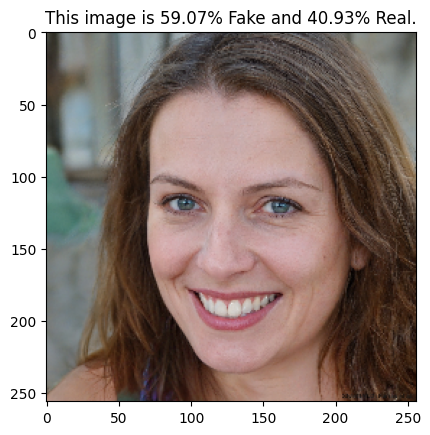

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Provide the path to your uploaded personal image
your_image_path = '/kaggle/input/thisperson/thispersondoesnotexist.jpg'  # Update this path to the correct image path
your_image = tf.keras.preprocessing.image.load_img(your_image_path, target_size=(256, 256, 3))

# Display your image
plt.imshow(your_image)

# Convert image to an array
your_image_arr = tf.keras.preprocessing.image.img_to_array(your_image)
your_image_arr = np.expand_dims(your_image_arr, axis=0)
your_image_arr = your_image_arr / 255.0

# Predict using your model
result = hybrid_model.predict(your_image_arr)

# Display the result with the title
plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")
plt.show()

In [29]:
# Assuming you have defined your model as 'hybrid_model'
predicted_labels = hybrid_model.predict(test_ds)

313/313 ━━━━━━━━━━━━━━━━━━━━ 74s 210ms/step


In [30]:
true_labels = test_ds.classes

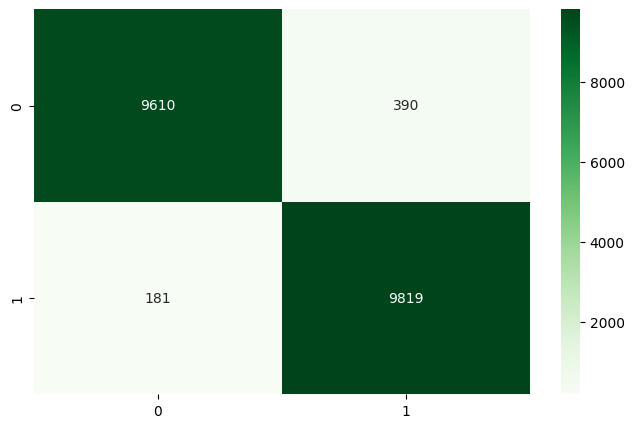

In [31]:
plt.figure(figsize = (8,5))
sns.heatmap(metrics.confusion_matrix(true_labels, predicted_labels.round()), annot = True,fmt="d",cmap = "Greens")
plt.show()

In [32]:
metrics.accuracy_score(true_labels, predicted_labels.round())

0.97145

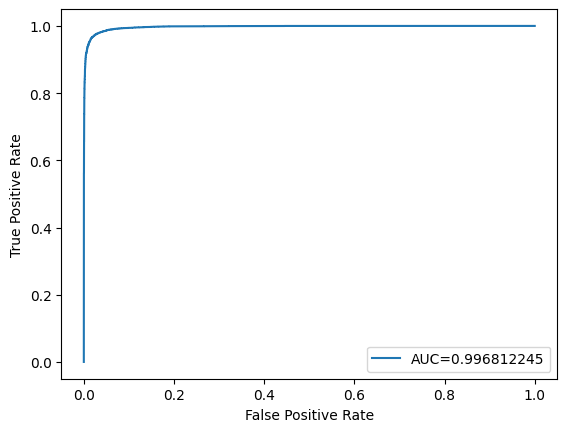

In [33]:
fpr, tpr, _ = metrics.roc_curve(true_labels,  predicted_labels)
auc = metrics.roc_auc_score(true_labels, predicted_labels)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Load the model
model = tf.keras.models.load_model('/kaggle/working/hybrid_deepfake_detection_model.keras')

# Make predictions on the test data
predictions = model.predict(test_ds)

# Convert predictions to binary labels (0 or 1)
#binary_predictions = (predictions > 0.5).astype(int)

# Get true labels from the test data generator
true_labels = test_ds.classes

# Generate the classification report
report = classification_report(true_labels)

print(report)

In [34]:
import os

# List the contents of the directory
print(os.listdir('/kaggle/working'))


['model_cp.weights.h5', 'hybrid5_deepfake_detection_model.keras', '.virtual_documents']


In [35]:
# Save the model as a .keras file
hybrid_model.save('hybrid_deepfake_detection_model.keras', save_format='keras')


In [36]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('hybrid_deepfake_detection_model.keras')


In [37]:
from sklearn.metrics import classification_report

# Make predictions on the test data
predictions = model.predict(test_ds)

# Convert predictions to binary labels (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Get true labels from the test data generator
true_labels = test_ds.classes

# Generate the classification report
report = classification_report(true_labels, binary_predictions)

print(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 72s 205ms/step
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     10000
           1       0.96      0.98      0.97     10000

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
from tensorflow.keras.models import load_model

# Load the previously saved model
initial_model = load_model('/kaggle/working/hybrid_deepfake_detection_model.keras')

In [ ]:
import os

# Define the file path
file_path = '/kaggle/working/hybrid_deepfake_detection_model.keras'

# Check if the file exists
if os.path.exists(file_path):
    print(f"The file '{file_path}' exists.")
else:
    print(f"The file '{file_path}' does not exist.")

# Optionally, list all files in the directory
print("\nFiles in the '/kaggle/working/' directory:")
for file in os.listdir('/kaggle/working/'):
    print(file)

In [38]:
# Save the model as a .keras file
hybrid_model.save('hybrid_deepfake_detection_model.keras', save_format='keras')

**Sri Lankan**

In [41]:
main_path = '/kaggle/input/sldataset/Sri Lankan Dataset Final'

train_dir = os.path.join(main_path, 'Train')
valid_dir = os.path.join(main_path, 'Validate')
test_dir = os.path.join(main_path, 'Test')

In [42]:
print("Train_dir Subfolders: ", os.listdir(train_dir))
print("Valid_dir Subfolders: ", os.listdir(valid_dir))
print("Test_dir Subfolders: ", os.listdir(test_dir))

Train_dir Subfolders:  ['Fake', 'Real']
Valid_dir Subfolders:  ['Fake', 'Real']
Test_dir Subfolders:  ['Fake', 'Real']


In [43]:
images_df = {
    "folder":[],
    "image_path":[],
    "label":[]
}

for folder in os.listdir(main_path): #iterate on each train, valid and test folder
    for label in os.listdir(main_path + "/" + folder): #iterate on fake and real folders (labels)
        for img in glob.glob(main_path + "/" + folder + "/" + label + "/*.jpg"):
            images_df["folder"].append(folder)
            images_df["image_path"].append(img)
            images_df["label"].append(label)

In [44]:
images_df = pd.DataFrame(images_df)

In [45]:
image_train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
                                  rescale=1./255.,
                                  horizontal_flip=True,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                  )

image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [46]:
train_ds2 = image_train_gen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
)

valid_ds2 = image_gen.flow_from_directory(
    valid_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

test_ds2 = image_gen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
    shuffle=False) #shuffle disabled

Found 240 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [47]:
# Evaluate the model on the test set
test_loss, test_acc = hybrid_model.evaluate(test_ds2)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5000 - loss: 4.2562
Test Loss: 4.256232738494873
Test Accuracy: 0.5


In [48]:
# Save the model as a .keras file
hybrid_model.save('/kaggle/working/hybrid_deepfake_detection_model.keras', save_format='keras')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


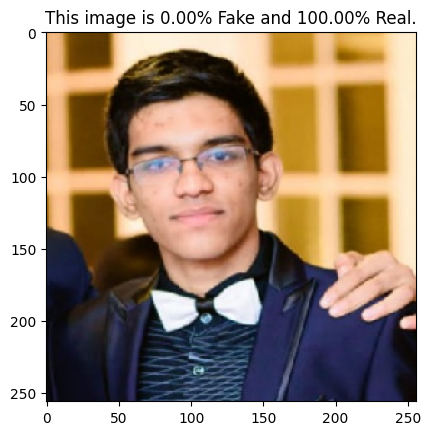

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Provide the path to your uploaded personal image
your_image_path = '/kaggle/input/sldataset/Sri Lankan Dataset Final/Test/Real/IMG-20211007-WA0004.jpg'  # Update this path to the correct image path
your_image = tf.keras.preprocessing.image.load_img(your_image_path, target_size=(256, 256, 3))

# Display your image
plt.imshow(your_image)

# Convert image to an array
your_image_arr = tf.keras.preprocessing.image.img_to_array(your_image)
your_image_arr = np.expand_dims(your_image_arr, axis=0)
your_image_arr = your_image_arr / 255.0

# Predict using your model
result = hybrid_model.predict(your_image_arr)

# Display the result with the title
plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


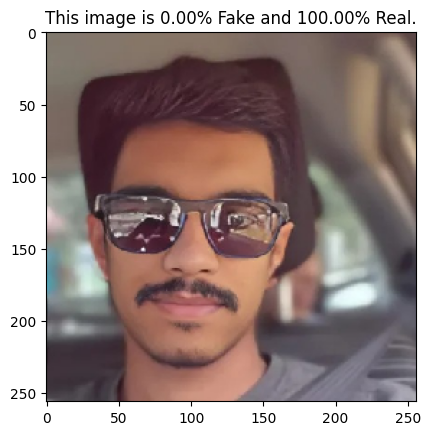

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Provide the path to your uploaded personal image
your_image_path = '/kaggle/input/sldataset/Sri Lankan Dataset Final/Test/Fake/0cbb7f9935ee859a5268011144037770.jpeg'  # Update this path to the correct image path
your_image = tf.keras.preprocessing.image.load_img(your_image_path, target_size=(256, 256, 3))

# Display your image
plt.imshow(your_image)

# Convert image to an array
your_image_arr = tf.keras.preprocessing.image.img_to_array(your_image)
your_image_arr = np.expand_dims(your_image_arr, axis=0)
your_image_arr = your_image_arr / 255.0

# Predict using your model
result = hybrid_model.predict(your_image_arr)

# Display the result with the title
plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")
plt.show()

In [56]:
# Save the model as a .keras file
hybrid_model.save('/kaggle/working/hybrid_deepfake_detection_model.keras', save_format='keras')
